In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_set = pd.read_csv('emails.csv')

In [ ]:
data_set.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
data_set.tail(5)

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [16]:
data_set.info()
data_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
categorical = [i for i in data_set.columns if data_set[i].dtype == 'O']
data_set[categorical]

,text
0,Subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...
2,Subject: unbelievable new homes made easy im ...
3,Subject: 4 color printing special request add...
4,"Subject: do not have money , get software cds ..."
...,...
5723,Subject: re : research and development charges...
5724,"Subject: re : receipts from visit jim , than..."
5725,Subject: re : enron case study update wow ! a...
5726,"Subject: re : interest david , please , call..."


In [14]:
ham = data_set[data_set['spam'] == 0]
spam = data_set[data_set['spam'] == 1]

In [19]:
print('Spam % = ', len(spam)/len(data_set)*100, '%')
print('Ham % = ', len(ham)/len(data_set)*100, '%') 

Spam % =  23.88268156424581 %
Ham % =  76.11731843575419 %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


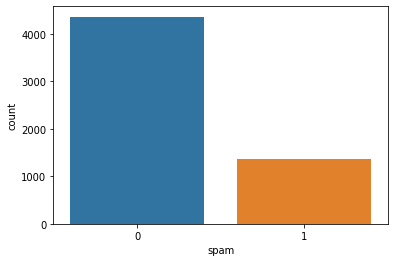

In [21]:
sns.countplot(data_set['spam'], label = 'Count Spam vs Ham')

## Count Vectorizer example

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
sample_data =['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer()

In [26]:
X = vectorizer.fit_transform(sample_data)

In [28]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [30]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


## Count Vectorizer to 'sample_data'

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
s_vectorizer = CountVectorizer()
spam_hamVec = s_vectorizer.fit_transform(data_set['text'])


In [35]:
print(s_vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [36]:
print(spam_hamVec.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
spam_hamVec.shape

(5728, 37303)

## Traing Model

In [39]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()

label = data_set['spam'].values

#input: spam_hamVec
#output: label

X_train = NB.fit(spam_hamVec, label)

## Testing

##### First Test

In [43]:
test_sample1 = ['Free Money!!!', 'Hi Tom, Please let me know if you need any informaiton']

In [44]:
test_smp1 = s_vectorizer.transform(test_sample1)

In [45]:
test_prediction1 = NB.predict(test_smp1)
test_prediction1

array([1, 0])

##### Second Test

In [47]:
test_sample2 = ['Hello, I am Jhon, I would like to book a hotel in Bali by June 24th', 'money']

In [48]:
test_smp2 = s_vectorizer.transform(test_sample2)
test_prediction2 = NB.predict(test_smp2)
test_prediction2

array([0, 1])

## Divide the data into tranning and testing prior to trainig

In [55]:
X = spam_hamVec
y = label

print("X: ", X.shape)
print("Y: ", y.shape)

X:  (5728, 37303)
Y:  (5728,)


In [56]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
from sklearn.naive_bayes import MultinomialNB     
NB_class = MultinomialNB()
NB_class.fit(X_train1, y_train)

MultinomialNB()

### Evaluation

In [59]:
from sklearn.metrics import classification_report, confusion_matrix

#### Model evaluation for "Traing" 

In [60]:
y_predict_train = NB_class.predict(X_train1) # will give what prediction looklike. What model says.
y_predict_train

array([0, 0, 1, ..., 0, 0, 0])

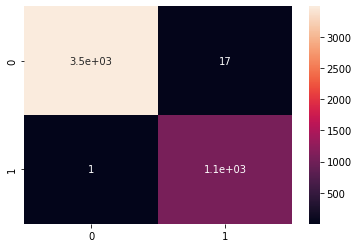

In [61]:
cm = confusion_matrix(y_train, y_predict_train)  # y_train is the parameter which realy on
sns.heatmap(cm, annot = True)

#### Model evaluation for "Testing" 

In [64]:
x_predict_test = NB_class.predict(X_test)
x_predict_test

array([0, 0, 0, ..., 0, 1, 0])

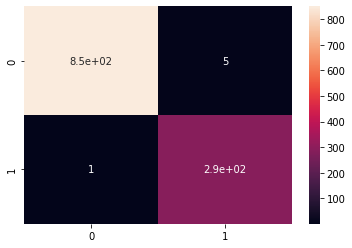

In [66]:
cm = confusion_matrix(y_test, x_predict_test)  # y_test is the parameter which realy on
sns.heatmap(cm, annot = True)

In [67]:
print(classification_report(y_test, x_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       855
           1       0.98      1.00      0.99       291

    accuracy                           0.99      1146
   macro avg       0.99      1.00      0.99      1146
weighted avg       0.99      0.99      0.99      1146

